# 分类器的不确定度估计

sklearn 中 自带获取分类不确定度的函数：  
- decision_function (决策函数)
- predict_proba (预测概率)

### 梯度提升模型中使用的例子

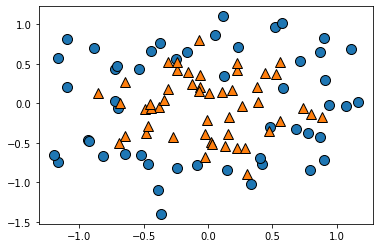

In [7]:
import numpy as np
import mglearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

# 构造数据
y_named = np.array(['blue', 'red'])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# 训练梯度提升模型
gbrt = GradientBoostingClassifier().fit(X_train, y_train_named)

## 决策函数

### 梯度提升模型结果分析

决策函数输出格式

In [10]:
print('X_test shape:', X_test.shape)
print('Decision function output shape:', gbrt.decision_function(X_test).shape)

X_test shape: (25, 2)
Decision function output shape: (25,)


决策函数输出分析

In [16]:
print('Decision function output:\n', gbrt.decision_function(X_test)[:6])

print('Thresholed decision function out:\n', gbrt.decision_function(X_test) > 0)
print('Translated out:\n', gbrt.classes_[(gbrt.decision_function(X_test) > 0).astype(int)])
print('Predicted out:\n', gbrt.predict(X_test))

Decision function output:
 [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]
Thresholed decision function out:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Translated out:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']
Predicted out:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


decision function 范围是不确定的

In [18]:
decision_f = gbrt.decision_function(X_test)
print('decision function min val:{:.3f}, max val:{:.3f}'.format(np.min(decision_f), np.max(decision_f)))

decision function min val:-7.691, max val:4.290


决策函数输出可视化

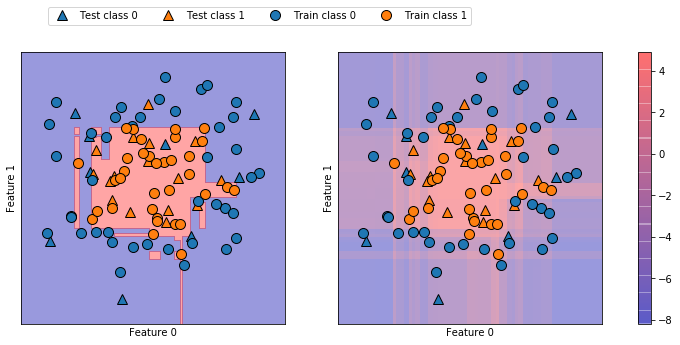

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1',
                'Train class 0', 'Train class 1'],
               ncol=4, loc=(0.1, 1.1))
plt.show()

## 预测概率

输出在每一个分类上的预测预测概率

In [34]:
# 预测概率的shape
print('shape of predict probabilities:', gbrt.predict_proba(X_test).shape)
print('predict probabilities:\n', gbrt.predict_proba(X_test)[:5])

shape of predict probabilities: (25, 2)
predict probabilities:
 [[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]]


可视化结果

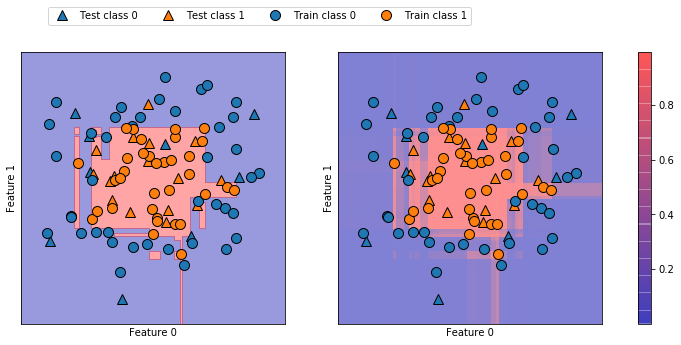

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1',
                'Train class 0', 'Train class 1'],
               ncol=4, loc=(0.1, 1.1))
plt.show()

## 多分类问题

多分类问题的决策函数的shape 为(n_samples, n_class)  
每一行代表每一个样本的预测结果  
每一列代表每一个分类shang的确定度分数  
预测概率同理

In [47]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=40)

gbrt = GradientBoostingClassifier().fit(X_train, y_train)

print('Decision function output shape:\n', gbrt.decision_function(X_test).shape)
print('Decision function output:\n', gbrt.decision_function(X_test)[:6])
print('Argmax of decision function:\n', np.argmax(gbrt.decision_function(X_test), axis=1))
print('predict:\n', gbrt.predict(X_test))

Decision function output shape:
 (38, 3)
Decision function output:
 [[ 4.41695055 -4.69580042 -6.39032048]
 [-6.41792352  2.05422084 -5.33162774]
 [-6.3934807  -4.13208454  4.47067296]
 [-6.3934807  -5.20354449  5.15516863]
 [-6.41792352  2.01950763 -6.38345904]
 [-6.3934807  -4.37545945  4.47067296]]
1.0
Argmax of decision function:
 [0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1 1 0 0 0 0 2 0
 0]
predict:
 [0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1 1 0 0 0 0 2 0
 0]


官方给出的多个模型的预测效果

Automatically created module for IPython interactive environment


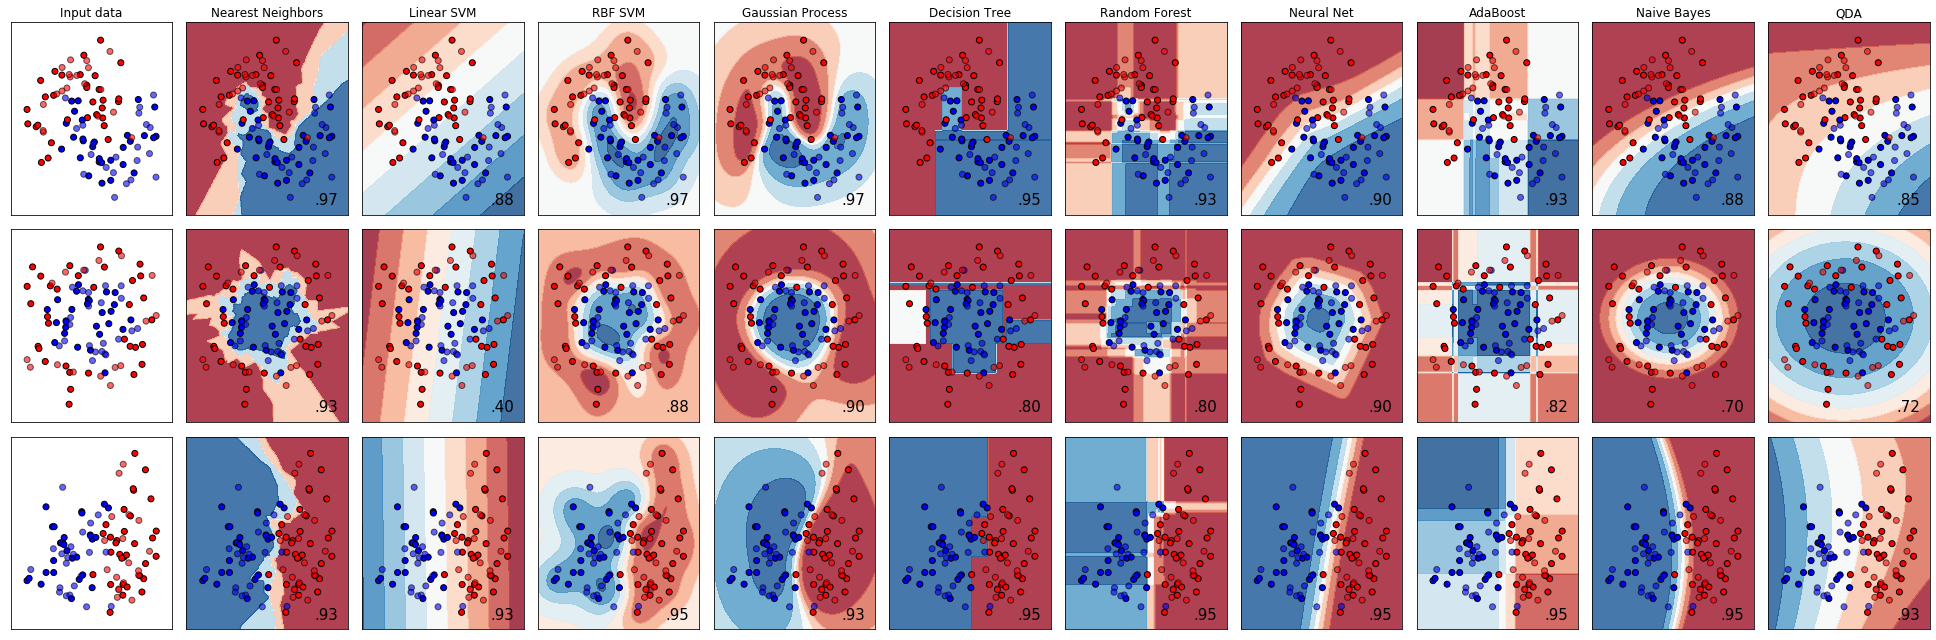

In [36]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()